The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='date'>

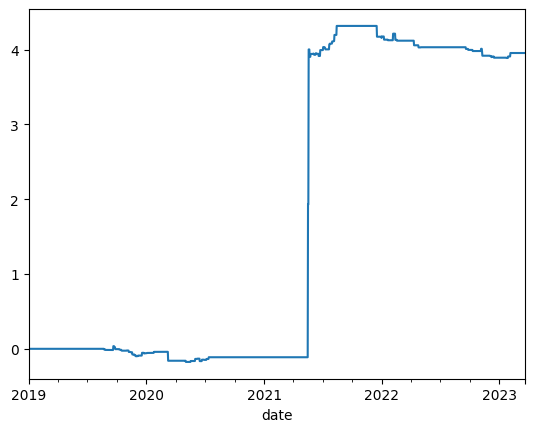

In [86]:
from backtest.repository.finance.finance_repo import FinanceRepo
%load_ext autoreload
%autoreload 2

from backtest.domains.strategy import StockData
from backtest.domains.strategy import Strategy
from backtest.domains.strategy_result import StrategyResult,StrategyResultColumnType
from backtest.domains.backtest import Backtest
from backtest.repository.webrepo.bithumb_repo import BithumbRepo
from backtest.repository.webrepo.upbit_repo import UpbitRepo
from backtest.repository.webrepo.binance_repo import BinanceRepo
from backtest.use_cases.stockdata_from_repo import stockdata_from_repo
from backtest.request.stockdata_from_repo import build_stock_data_from_repo_request
from backtest.use_cases.strategy_execute import rsi_function, rsi_big_stock_function, greed_fear_index_function
from backtest.use_cases.backtest_execute import backtest_execute
from backtest.util.stockdata_util import get_greed_fear_index
import pandas as pd

request = build_stock_data_from_repo_request(
    filters={'order__eq': 'ALGO', 'from__eq': '2019-01-01'})
response = stockdata_from_repo(BithumbRepo(), request=request)

request2 = build_stock_data_from_repo_request(
    filters={'order__eq': 'BTC', 'from__eq': '2019-01-01'})
response2 = stockdata_from_repo(BithumbRepo(), request=request2)

request3 = build_stock_data_from_repo_request(
    filters={'order__eq': 'ETH', 'from__eq': '2019-01-01'})
response3 = stockdata_from_repo(BithumbRepo(), request=request3)

request5 = build_stock_data_from_repo_request(
    filters={'order__eq': 'ADA', 'from__eq': '2019-01-01'})
response5 = stockdata_from_repo(BithumbRepo(), request=request5)

request4 = build_stock_data_from_repo_request(
    filters={'order__eq': 'US500', 'from__eq': '2019-01-01'})
response4 = stockdata_from_repo(FinanceRepo(), request=request4)

stockdata1 = response.value
stockdata2 = response2.value
stockdata3 = response3.value
stockdata4 = response4.value
stockdata5 = response5.value
greed_fear_df = get_greed_fear_index()

strategy1 = Strategy(name='snp_big_stock', function=rsi_big_stock_function,
                    weight=3, options={'big_stock': stockdata4, 'rolling': 100})
strategy2 = Strategy(name='sma_big_stock', function=rsi_big_stock_function,
                    weight=2, options={'big_stock': stockdata2, 'rolling': 90})
strategy3 = Strategy(name='sma_self', function=rsi_function,
                    weight=1, options={'rolling': 10})
strategy4 = Strategy(name='Greed_Fear_Index',function=greed_fear_index_function,
                    weight=1, options={'greed_fear_index_data': greed_fear_df,'index_fear' : 20,'index_greed':60})
backtest = Backtest(strategy_list=[strategy1,strategy2,strategy3,strategy4], stockdata_list=[stockdata1,stockdata2,stockdata3,stockdata5])
backtest_result = backtest_execute(backtest).value
backtest_result.value
df=backtest_result.value['total_profit'].expanding().sum()
df.plot(kind='line')

In [83]:
backtest_result.value['total_profit'].min()

-0.14421900434758708